In [2]:
from pathinference import PathInference
from pathinference.helper import confidence_ellipse
from pathinference.kernel import kernelwrap, EQ
import numpy as np

Generate a synthetic example dataset

In [3]:
stationlocations = np.array([[3,3,0],[3,-3,0],[-3,3,0]])
obstimes = np.linspace(0,5,30)

observations = []
true_locations = []
for i,t in enumerate(obstimes):
    location = np.array([np.cos(np.pi*2*t/10)*10+10,np.sin(np.pi*2*t/10)*10,t/10])
    vect = location-stationlocations
    vect/= np.linalg.norm(vect,axis=1)[:,None]
    possibleobs = np.c_[stationlocations,vect]
    obs = possibleobs[i%3,:]
    observations.append(obs)
    true_locations.append(location)
observations = np.array(observations)
true_locations = np.array(true_locations)

Set up the path inference object:
- obstimes are the times we observed the tag
- observations are a series of [observer-location, vector-to-tag] rows
- EQ is our kernel
- likenoisescale - the standard deviation of our noise (e.g. in metres).

In [4]:
pathi = PathInference(obstimes, observations, kernelwrap(EQ,ls=5,scale=50), likenoisescale=0.2, Nind=7)

Run the inference. I've reduced the iterations to 500, and increased step size to 0.5 to run this demo notebook quickly.

In [5]:
pathi.run(500,0.5)

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.
0 [16075.03]
20 [6182.6797]
40 [2775.44]
60 [1584.1279]
80 [973.9265]
100 [621.9232]
120 [387.77078]
140 [240.9237]
160 [147.47525]
180 [93.81065]
200 [65.1064]
220 [50.72304]
240 [43.117332]
260 [40.345123]
280 [38.43292]
300 [38.18945]
320 [37.806316]
340 [38.022995]
360 [37.62985]
380 [37.664562]
400 [37.69392]
420 [37.711433]
440 [37.809566]
460 [37.80866]
480 [37.65918]


Build an input test matrix, and compute the mean and covariance at each of these test points

In [6]:
Xtest = pathi.buildinputmatrix(100)
M,C = pathi.getpredictions(Xtest)

Plot the results

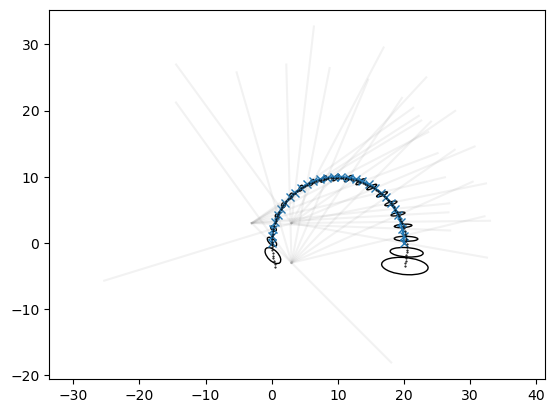

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.axis('equal')
plt.plot(true_locations[:,0],true_locations[:,1],'x-')
plt.axis('equal')
for obs in observations:
    plt.plot([obs[0],obs[0]+obs[3]*30],[obs[1],obs[1]+obs[4]*30],color='grey',alpha=0.1)

ax = plt.gca()
for i,(m,c) in enumerate(zip(M.numpy(),C.numpy())):
    std = max(np.sqrt(c[0,0]),np.sqrt(c[1,1]))
    plt.plot(m[0],m[1],'.k',markersize=1)

    if i%5==0:
        el = confidence_ellipse(m[:2],c[:2,:2],ax)
        ax.add_patch(el)

plt.show()

If lengthscale is reduced one can see we have a quick reversion back to the origin (due to the short lengthscale).